## Question 1
Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials
Occupations

Step 1. Import the necessary libraries

Step 2. Import the dataset from this address.

Step 3. Assign it to a variable called users

Step 4. Discover what is the mean age per occupation

Step 5. Discover the Male ratio per occupation and sort it from the most to the least

Step 6. For each occupation, calculate the minimum and maximum ages

Step 7. For each combination of occupation and sex, calculate the mean age

Step 8. For each occupation present the percentage of women and men

In [1]:
import pandas as pd
import numpy as np

In [2]:
users = pd.read_table(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user',sep="|")
users.head(2)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043


#### Step 4

In [3]:
mean_age = users.groupby('occupation').age.mean()
mean_age

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

#### Step 5

In [7]:
male_count = users[users["gender"] == "M"].groupby("occupation").count()["gender"]
total_male = users.groupby("occupation").count()["gender"]
male_ratio = (male_count / total_male).round(2) * 100


male_ratio_sort = male_ratio.sort_values(ascending=False)

print(male_ratio_sort)

occupation
doctor           100.0
engineer          97.0
technician        96.0
retired           93.0
executive         91.0
programmer        91.0
scientist         90.0
entertainment     89.0
lawyer            83.0
salesman          75.0
educator          73.0
student           69.0
other             66.0
marketing         62.0
writer            58.0
none              56.0
administrator     54.0
artist            54.0
librarian         43.0
healthcare        31.0
homemaker         14.0
Name: gender, dtype: float64


#### Step 6

In [8]:
users.groupby('occupation').age.agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


#### Step 7

In [9]:
users.groupby(['occupation', 'gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

#### Step 8

In [12]:
count_men_women = users.groupby(['occupation','gender']).agg({'gender':'count'})
total_men_women_occupation = users.groupby(['occupation']).agg('count')
perc_men_women = count_men_women.div(total_men_women_occupation,level='occupation') * 100
perc_men_women.loc[:,'gender']

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

## Question 2
Euro Teams
Step 1. Import the necessary libraries

Step 2. Import the dataset from this address

Step 3. Assign it to a variable called euro12

Step 4. Select only the Goal column

Step 5. How many team participated in the Euro2012?

Step 6. What is the number of columns in the dataset?

Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

Step 8. Sort the teams by Red Cards, then to Yellow Cards

Step 9. Calculate the mean Yellow Cards given per Team

Step 10. Filter teams that scored more than 6 goalsStep 11. Select the teams that start with G

Step 12. Select the first 7 columns

Step 13. Select all columns except the last 3

Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [13]:
# step 1 to 3
euro12 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv")
euro12.head(2)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19


#### Step 4

In [14]:
euro12.Goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

#### Step 5

In [15]:
euro12.Team.agg('count')

16

#### Step 6

In [17]:
print(euro12.shape[1], 'columns')

35 columns


#### Step 7

In [18]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline.head(2)

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0


#### Step 8

In [19]:
discipline.sort_values(by=['Red Cards', 'Yellow Cards'], inplace = True)
discipline.head(4)

C:\Users\HP\AppData\Local\Temp\ipykernel_27676\1041741802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discipline.sort_values(by=['Red Cards', 'Yellow Cards'], inplace = True)


,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0


#### Step 9

In [20]:
discipline['Yellow Cards'].sum() / len(discipline['Team'])

7.4375

#### Step 10

In [25]:
team_6 = euro12[euro12["Goals"] >= 6] 
team_6[['Team',"Goals"]]


,Team,Goals
5,Germany,10
7,Italy,6
10,Portugal,6
13,Spain,12


#### Step 11

In [26]:
Teams = euro12['Team'][euro12.Team.str[0]=='G']
Teams

5    Germany
6     Greece
Name: Team, dtype: object

#### Step 12

In [32]:
column_7 = euro12.iloc[:,0:7]
column_7

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


#### Step13

In [33]:
euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


#### Step 14

In [34]:
euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']), ['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


## Question 3
Housing

Step 1. Import the necessary libraries

Step 2. Create 3 differents Series, each of length 100, as follows:

    • The first a random number from 1 to 4

    • The second a random number from 1 to 3

    • The third a random number from 10,000 to 30,000

Step 3. Create a DataFrame by joinning the Series by column

Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

Step 6. Ops it seems it is going only until index 99. Is it true?

In [35]:
import random

#### Step 2

In [36]:
first = pd.Series(np.random.randint(1,4,100))
second = pd.Series(np.random.randint(1,3,100))
third = pd.Series(np.random.randint(10000,30000,100))

#### Step 3

In [37]:
series_col = pd.concat([first,second,third],axis=1)
series_col.head(2)

,0,1,2
0,2,2,20399
1,1,2,12853


#### Step 4

In [38]:
series_col.columns = ['bedrs','bathrs','price_sqr_meter']
series_col.head(2)

,bedrs,bathrs,price_sqr_meter
0,2,2,20399
1,1,2,12853


#### Step 5

In [39]:
bigcolumn = pd.concat([first,second,third],axis=0)
bigcolumn

0         2
1         1
2         3
3         1
4         2
      ...  
95    17573
96    22818
97    27035
98    24529
99    23848
Length: 300, dtype: int32

#### Step 6

In [41]:
bigcolumn.shape  

(300,)

It goes upto 300th index

#### Step 7

In [42]:
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn

0          2
1          1
2          3
3          1
4          2
       ...  
295    17573
296    22818
297    27035
298    24529
299    23848
Length: 300, dtype: int32

## Question 4
Wind Statistics

The data have been modified to contain some missing values, identified by NaN.

Using pandas should make this exercise easier, in particular for the bonus question.

You should be able to perform all of these operations without using a for loop or other looping construct.

The data in 'wind.data' has the following format:
    
    Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL

    61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04

    61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83

    61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71

The first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day.
Step 1. Import the necessary libraries

Step 2. Import the dataset from the attached file wind.txt

Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

Step 7. Compute how many non-missing values there are in total.

Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.A single number for the entire dataset.

Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the daysA different set of numbers for each location.

Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.A different set of numbers for each day.

Step 11. Find the average windspeed in January for each location.Treat January 1961 and January 1962 both as January.

Step 12. Downsample the record to a yearly frequency for each location.

Step 13. Downsample the record to a monthly frequency for each location.

Step 14. Downsample the record to a weekly frequency for each location.

Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks

In [43]:
import datetime

#### Step 2 to 3

In [44]:
data = pd.read_table('wind.txt', sep='\s+',parse_dates = [[0,1,2]])
data.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_27676\1687113911.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_table('wind.txt', sep='\s+',parse_dates = [[0,1,2]])


,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


#### Step 4

In [45]:
def year_func(x):
  year = x.year - 100 if x.year > 1989 else x.year
  return datetime.date(year, x.month, x.day)

data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(year_func)

data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


#### Step 5

In [46]:
data["Yr_Mo_Dy"] = pd.to_datetime(data["Yr_Mo_Dy"])
data = data.set_index('Yr_Mo_Dy')
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


#### Step 6

In [53]:
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [54]:
new_data = data.dropna()

#### Step 7

In [55]:
data.notnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

#### Step 8

In [56]:
new_data.sum().sum() / new_data.notna().sum().sum()

10.222465245951726

#### Step 9

In [61]:
loc_stats = pd.DataFrame()
loc_stats['min'] = new_data.min(axis = 0) # min
loc_stats['max'] = new_data.max(axis = 0) # max 
loc_stats['mean'] = new_data.mean(axis = 0) # mean
loc_stats['std'] = new_data.std(axis = 0) # std

loc_stats.head()

,min,max,mean,std
RPT,0.67,35.80,12.359979,5.618805
VAL,0.21,33.37,10.640267,5.268695
ROS,1.50,33.84,11.656396,5.007805
KIL,0.00,28.46,6.298587,3.600942
SHA,0.13,37.54,10.448923,4.933988


#### Step 10

In [62]:
day_stats = pd.DataFrame()
day_stats['min'] = new_data.min(axis = 1) # min
day_stats['max'] = new_data.max(axis = 1) # max 
day_stats['mean'] = new_data.mean(axis = 1) # mean
day_stats['std'] = new_data.std(axis = 1) # std

day_stats.head()

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
1961-01-06,4.42,13.21,8.240000,2.998063
1961-01-07,4.96,14.29,10.385000,3.072114
1961-01-08,5.91,16.62,10.487500,3.547237


#### Step 11

In [63]:
new_data.loc[new_data.index.month == 1].mean()

RPT    14.831609
VAL    12.885389
ROS    13.276275
KIL     7.152477
SHA    11.644467
BIR     8.030561
DUB    11.788336
CLA     9.486962
MUL     9.511501
CLO    10.024069
BEL    14.527848
MAL    18.041826
dtype: float64

#### Step 12

In [64]:
new_data.groupby(new_data.index.to_period('A')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961,12.207588,10.207206,11.282853,6.846441,10.742735,7.617147,9.633265,8.684912,8.571941,9.700471,13.271559,13.587206
1962,12.274779,10.150856,11.714365,6.964337,10.692265,7.415331,11.043122,8.829807,8.335552,9.693812,12.985691,14.361436
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


#### Step 13

In [65]:
new_data.groupby(new_data.index.to_period('M')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01,14.506154,11.225385,12.960385,6.840000,10.509231,8.174231,10.403077,8.670769,8.323462,9.490385,13.270000,14.341538
1961-02,16.401923,15.037308,14.470000,9.242692,13.778077,10.884615,11.868077,11.746154,11.748462,12.626538,18.165000,15.300769
1961-03,10.660000,11.097407,10.420000,7.100741,10.265556,8.580000,9.108519,9.329259,10.100000,10.989630,16.066296,15.418889
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05,10.024643,8.495714,10.539286,5.992500,9.480357,6.633929,7.645714,8.206786,8.120714,8.534643,11.912143,11.911786
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


#### Step 14

In [66]:
new_data.groupby(new_data.index.to_period('W')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-02/1961-01-08,12.316000,10.408000,10.050000,5.658000,8.506000,6.242000,10.936000,5.932000,8.150000,8.428000,11.416000,13.226000
1961-01-09/1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-16/1961-01-22,12.100000,9.500000,11.681667,4.293333,8.966667,6.938333,7.828333,7.291667,5.891667,6.693333,9.993333,10.346667
1961-01-23/1961-01-29,19.880000,14.846667,17.548333,11.916667,16.325000,14.016667,14.450000,14.311667,13.316667,14.921667,19.800000,22.388333
1961-01-30/1961-02-05,16.827143,15.460000,12.618571,8.247143,13.361429,9.107143,12.204286,8.548571,9.821429,9.460000,14.012857,11.935714
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-11-27/1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-04/1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-11/1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


#### Step 15

In [67]:
week = new_data.resample('W').agg(['min','max','mean','std'])
week.loc[week.index[1:53], "RPT":"MAL"].head(10)

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Yr_Mo_Dy                                                                 
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  17.75  12.100000  4.893064   3.42  14.37   9.500000   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  20.79  14.846667   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  14.956667  5.525210  11.63  20.17  15.008333   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  11.824000  1.071742   8.83  17.00  12.956000   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.195000   
1961-03-19   4.92  16.88  11.911429  3.860036   9.46  15.54  13.501429   

                        ROS         ...        CLO              BEL         \
                 std    min    max  ...       mean       std    min    max   
Yr_Mo_Dy                            ...                                      
1961-01-15  3.148945   7.08  19.50  ...   7.571429  4.084293   5.25  20.71   
1961-01-22  4.070420   7.29  17.33  ...   6.693333  3.203652   6.50  15.92   
1961-01-29  4.242125  12.67  25.84  ...  14.921667  3.494638  14.04  26.08   
1961-02-05  5.187395   9.04  19.70  ...   9.460000  2.839501   9.17  19.33   
1961-02-12  3.608373  13.67  21.34  ...  14.440000  1.746749  15.21  26.38   
1961-02-19  3.908818   6.13  19.41  ...  13.521667  2.772287  14.09  28.62   
1961-02-26  5.147348   6.08  22.42  ...  12.730000  4.920064   9.59  23.21   
1961-03-05  3.490319   8.17  13.67  ...  12.068000  1.729775  11.58  23.45   
1961-03-12  3.359302   7.54  15.50  ...   9.570000  3.065864  10.21  22.71   
1961-03-19  2.352867   5.25  13.96  ...  11.627143  3.099472  11.29  22.79   

                                   MAL                              
                 mean       std    min    max       mean       std  
Yr_Mo_Dy                                                            
1961-01-15  11.125714  5.552215   5.17  16.92  11.024286  4.692355  
1961-01-22   9.993333  3.941358   6.79  16.08  10.346667  3.407132  
1961-01-29  19.800000  4.675044  17.50  27.63  22.388333  4.224639  
1961-02-05  14.012857  4.210858   7.17  19.25  11.935714  4.336104  
1961-02-12  21.832857  4.063753  17.04  21.84  19.155714  1.828705  
1961-02-19  19.756667  5.021524  10.96  22.58  15.925000  4.763632  
1961-02-26  16.304286  5.091162   6.67  23.87  14.322857  6.182283  
1961-03-05  17.174000  5.058249   8.83  17.54  14.108000  3.350772  
1961-03-12  16.068333  4.408144   5.54  18.16  13.066667  4.956336  
1961-03-19  19.350000  3.779727  11.34  22.95  16.227143  4.331958  

[10 rows x 48 columns]

## Question 5
Step 1. Import the necessary libraries

Step 2. Import the dataset from this address.

Step 3. Assign it to a variable called chipo.

Step 4. See the first 10 entries

Step 5. What is the number of observations in the dataset?

Step 6. What is the number of columns in the dataset?

Step 7. Print the name of all the columns.

Step 8. How is the dataset indexed?

Step 9. Which was the most-ordered item?

Step 10. For the most-ordered item, how many items were ordered?

Step 11. What was the most ordered item in the choice_description column?

Step 12. How many items were orderd in total?

Step 13.
    • Turn the item price into a float
    • Check the item price type
    • Create a lambda function and change the type of item price
    • Check the item price type

Step 14. How much was the revenue for the period in the dataset?

Step 15. How many orders were made in the period?

Step 16. What is the average revenue amount per order?

Step 17. How many different items are sold?

#### Step 1 to 4

In [69]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep= '\t')
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


#### Step 5 - 6

In [70]:
chipo.shape

(4622, 5)

 number of observations: 4622
 
 number of columns : 5

#### Step 7

In [71]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

#### Step 8

In [73]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

#### Step 9 - 10

In [74]:
chipo.groupby(by="item_name").sum().sort_values('quantity',ascending=False).head(1)

,order_id,quantity,choice_description,item_price
item_name,,,,
Chicken Bowl,713926,761,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98 $10.98 $11.25 $8.75 $8.49 $11.25 $8.75 ...


famous orderd item : Chicken Bowl

order quantity for famous item is 761

#### Step 11

In [75]:
chipo.groupby(by="choice_description").sum().sort_values('quantity',ascending=False).head(1)

,order_id,quantity,item_name,item_price
choice_description,,,,
[Diet Coke],123455,159,Canned SodaCanned SodaCanned Soda6 Pack Soft D...,$2.18 $1.09 $1.09 $6.49 $2.18 $1.25 $1.09 $6.4...


#### Step 12

In [76]:
chipo.quantity.sum()

4972

#### Step 13 

In [97]:
new_data = pd.DataFrame(chipo)
new_data['item_price'] = new_data['item_price'].str.replace('[\\$\\,]', '', regex=True).astype(float)
print(new_data.dtypes)

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
revenue                object
dtype: object


#### Step 14

In [98]:
new_data['revenue'] = new_data['quantity'] * new_data['item_price']
total = new_data['revenue'].sum()
print(f'revenue = $ {total}')

revenue = $ 39234.63


#### Step 15

In [101]:
a = chipo.order_id.value_counts().count()
a

1834

#### Step 16

In [102]:
average = total / a
print(f'average revenue amount per order is = ${average}')

average revenue amount per order is = $21.3929280261723


#### Step 17

In [104]:
chipo.item_name.nunique()

50

## Question 6
Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.

Don't forget to label your axes!


In [105]:
import matplotlib.pyplot as plt
%matplotlib inline

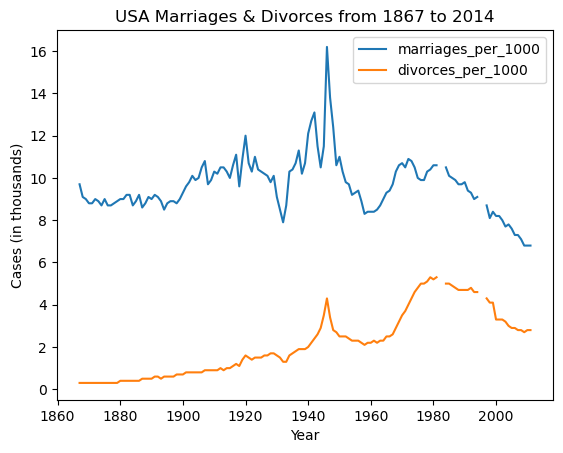

In [114]:
data = pd.read_csv('us-marriages-divorces-1867-2014.csv')
years = data['Year'].values
marriages_per_capita = data['Marriages_per_1000'].values
divorces_per_capita = data['Divorces_per_1000'].values

plt.plot(years, marriages_per_capita, label='marriages_per_1000')

plt.plot(years, divorces_per_capita, label='divorces_per_1000')

plt.title('USA Marriages & Divorces from 1867 to 2014')
plt.xlabel('Year')
plt.ylabel('Cases (in thousands)')
plt.legend()
plt.show()

## Question 7
Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!


Text(0, 0.5, 'cases (in thousands)')

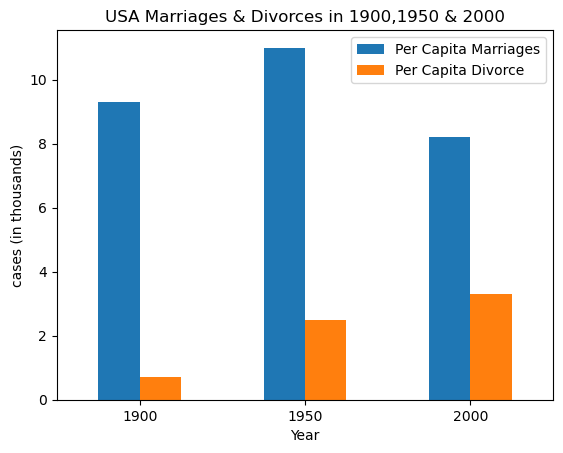

In [125]:
data = pd.read_csv('us-marriages-divorces-1867-2014.csv')
data = data[data['Year'].apply(lambda x: x in [1900, 1950, 2000])]

years = data['Year'].values
marriages_per_capita = data['Marriages_per_1000'].values
divorces_per_capita = data['Divorces_per_1000'].values

df = pd.DataFrame({'Per Capita Marriages': marriages_per_capita,
                   'Per Capita Divorce': divorces_per_capita}, index=years)
ax = df.plot.bar(rot=0)
ax.set_title("USA Marriages & Divorces in 1900,1950 & 2000")
ax.set_xlabel("Year")
ax.set_ylabel("cases (in thousands)")

## Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!

In [128]:
data = pd.read_csv('actor_kill_counts.csv')
data.head(2)

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295


Text(0, 0.5, 'Name of Actors')

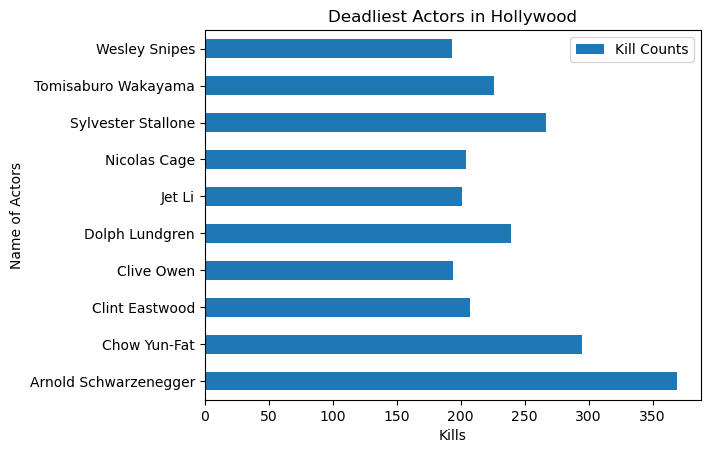

In [131]:
dealiest_actor = data['Actor'].values
kill_count = data['Count'].values

df = pd.DataFrame({'Actors Name': dealiest_actor,
                   'Kill Counts': kill_count},index=dealiest_actor)
ax = df.plot.barh()

ax.set_title("Deadliest Actors in Hollywood")
ax.set_xlabel("Kills")
ax.set_ylabel("Name of Actors")

## Question 9
Create a pie chart showing the fraction of all Roman Emperors that were assassinated.

Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories

In [139]:
data = pd.read_csv('roman-emperor-reigns.csv')


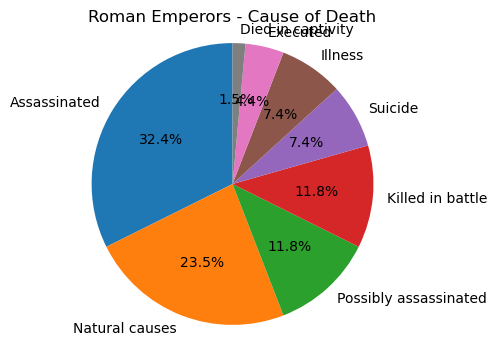

In [144]:
cause_counts = data['Cause_of_Death'].value_counts()


plt.figure(figsize=(4, 4))
plt.pie(cause_counts, labels=cause_counts.index,autopct='%1.1f%%', startangle=90)
plt.title("Roman Emperors - Cause of Death")
plt.axis('equal')  


plt.show()


## Question 10
Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.

Don't forget to label your axes!

Color each dot according to its year

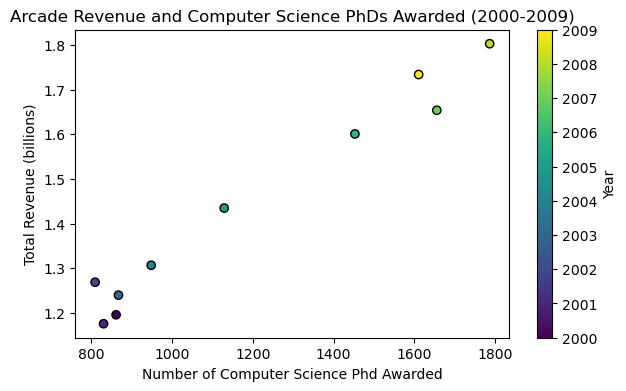

In [149]:
data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

data.columns = ['Year','Total_Arcade_Revenue_Billions', 'Computer_Science_Doctorates_US']
plt.figure(figsize=(7, 4))
plt.scatter(data['Computer_Science_Doctorates_US'], data['Total_Arcade_Revenue_Billions'], c=data['Year'], cmap='viridis', edgecolors='k')
plt.colorbar(label='Year')
plt.xlabel('Number of Computer Science Phd Awarded')
plt.ylabel('Total Revenue (billions)')
plt.title('Arcade Revenue and Computer Science PhDs Awarded (2000-2009)')
plt.show()